In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
#use dataframe to import the dataset
df = pd.read_csv("C:/Users/darth/Dropbox/Study/Study/Business Analytics/LA/2019.2.18/wine.csv")
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [97]:
dataset = np.array(df)
shape = dataset.shape
#print(shape)

#seperate the dataset for the plots
year = dataset[:,0]
price = dataset[:,1]
winterRain = dataset[:,2]
agst = dataset[:,3]
harvestRain = dataset[:,4]
age = dataset[:,5]
francePop = dataset[:,6]
print(year,price,winterRain,agst,harvestRain,age,francePop,sep='\n')

[1952. 1953. 1955. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.
 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977.
 1978.]
[7.495  8.0393 7.6858 6.9845 6.7772 8.0757 6.5188 8.4937 7.388  6.7127
 7.3094 6.2518 7.7443 6.8398 6.2435 6.3459 7.5883 7.1934 6.2049 6.6367
 6.2941 7.292  7.1211 6.2587 7.186 ]
[600. 690. 502. 420. 582. 485. 763. 830. 697. 608. 402. 602. 819. 714.
 610. 575. 622. 551. 536. 376. 574. 572. 418. 821. 763.]
[17.1167 16.7333 17.15   16.1333 16.4167 17.4833 16.4167 17.3333 16.3
 15.7167 17.2667 15.3667 16.5333 16.2333 16.2    16.55   16.6667 16.7667
 14.9833 17.0667 16.3    16.95   17.65   15.5833 15.8167]
[160.  80. 130. 110. 187. 187. 290.  38.  52. 155.  96. 267.  86. 118.
 292. 244.  89. 112. 158. 123. 184. 171. 247.  87.  51.]
[31. 30. 28. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12.
 11. 10.  9.  8.  7.  6.  5.]
[43183.569 43495.03  44217.857 45152.252 45653.805 46128.638 46583.995
 47128.005 48088.673 48798.99  49356

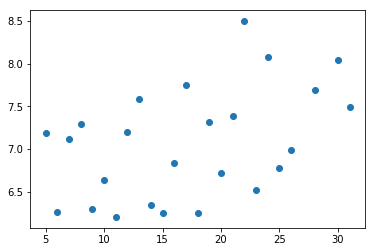

In [98]:
#scatter plot: y-axis: price, x-axis: age
plt.scatter(age,price)

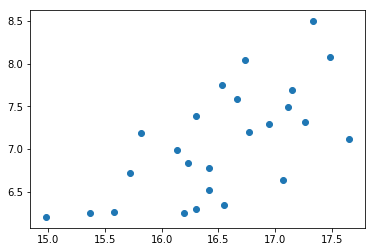

In [99]:
#scatter plot: y-axis: price, x-axis: agst
plt.scatter(agst,price)

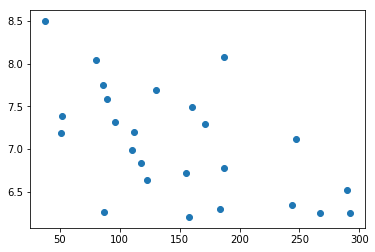

In [100]:
#scatter plot: y-axis: price, x-axis: harvest rain
plt.scatter(harvestRain,price)

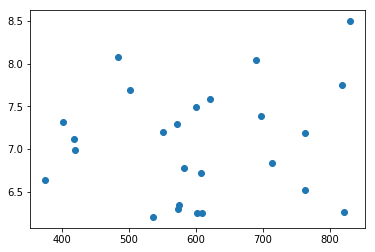

In [101]:
#scatter plot: y-axis: price, x-axis: winter rain
plt.scatter(winterRain,price)

R squared: 0.44


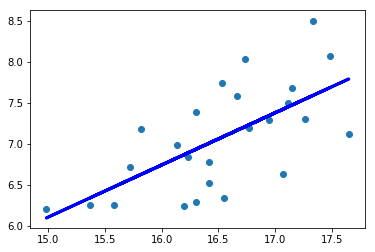

In [102]:
#use sci-kit learn to model a linear regression
agst = dataset[:,3].reshape(-1,1)
price = dataset[:,1].reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(agst,price)
price_pred = regr.predict(agst)
print('R squared: %.2f' % r2_score(price, price_pred))
# Plot outputs
plt.scatter(agst, price)
plt.plot(agst, price_pred, color='blue', linewidth=3)

In [103]:
# Build the linear regression model with all the covariates
regr = linear_model.LinearRegression()
X = dataset[:,2:]
regr.fit(X,price)
price_pred = regr.predict(X)
print('R squared: %.2f' % r2_score(price, price_pred))
print('coefficeints: ', regr.coef_ )
print('intercept: ', regr.intercept_ )

R squared: 0.83
coefficeints:  [[ 1.04250681e-03  6.01223884e-01 -3.95812450e-03  5.84748489e-04
  -4.95273038e-05]]
intercept:  [-0.45039886]


In [104]:
#Calculate the correlation between different variables in the data frame wine
df.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [105]:
df['Age'].corr(df['FrancePop'])

-0.9944850971114547

In [106]:
#Build the linear regression model with France population removed from the covariates.
model3 = linear_model.LinearRegression()
X = dataset[:,2:-1]
model3.fit(X,price)
price_pred = model3.predict(X)
print('R squared: %.2f' % r2_score(price, price_pred))
print('coefficeints: ', model3.coef_ )
print('intercept: ', model3.intercept_ )

R squared: 0.83
coefficeints:  [[ 0.00107551  0.60720935 -0.00397153  0.02393083]]
intercept:  [-3.42998019]


In [107]:
##Calculate the out-of-sample R-squared for model3
#Load the testing data
df_test = pd.read_csv("C:/Users/darth/Dropbox/Study/Study/Business Analytics/LA/2019.2.18/wine_test.csv")
df_test.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [108]:
# simply re-predict with the model
dataset1 = np.array(df_test)
X1 = dataset1[:,2:-1]
price1 = dataset1[:,1].reshape(2,1)
price_pred = model3.predict(X1)
print('Predicted Price: ',price_pred)
#print('R squared: %.2f' % r2_score(price1, price_pred))
print('coefficeints: ', model3.coef_ )
print('intercept: ', model3.intercept_ )


# Compute R-squared
SSE3 = np.sum((price1[:]-price_pred[:])**2)
print(SSE3)

SST = np.sum((price1[:] - np.mean(price))**2)
print(SST)

Rsquared3 = 1 - SSE3/SST
print(Rsquared3)

Predicted Price:  [[6.76892463]
 [6.6849104 ]]
coefficeints:  [[ 0.00107551  0.60720935 -0.00397153  0.02393083]]
intercept:  [-3.42998019]
0.06926280848772651
0.3369268563519997
0.7944277602632984


In [109]:
## Price ~ AGST
agst = dataset[:,3].reshape(-1,1)
price = dataset[:,1].reshape(-1,1)



model1 = linear_model.LinearRegression()
model1.fit(agst,price)
print('coefficeints: ',model1.coef_)
print('intercept: ',model1.intercept_)
predictTest1 = model1.predict(df_test['AGST'].values.reshape(-1, 1))
print(predictTest1)

# Compute R-squared
SSE1 = np.sum((price1[:]-predictTest1[:])**2)
print(SSE1)

Rsquared1 = 1 - SSE1/SST
print(Rsquared1)

coefficeints:  [[0.63509431]]
intercept:  [-3.41776131]
[[6.84961783]
 [6.74374761]]
0.07135756978802694
0.7882105019450361


In [110]:
## Price ~ AGST + Harvest Rain
model4 = linear_model.LinearRegression()
X4 = np.hstack((agst,harvestRain.reshape(25,1))) 
model4.fit(X4,price)
print('coefficeints: ',model4.coef_)
print('intercept: ',model4.intercept_)
X4_pred = np.hstack((df_test['AGST'].values.reshape(-1, 1),df_test['HarvestRain'].values.reshape(-1, 1)))
predictTest4 = model4.predict(X4_pred)
print(predictTest4)

# Compute R-squared
SSE4 = np.sum((price1[:]-predictTest4[:])**2)
print(SSE4)

Rsquared4 = 1 - SSE4/SST
print(Rsquared4)

coefficeints:  [[ 0.60261691 -0.00457006]]
intercept:  [-2.2026536]
[[6.98212642]
 [7.10103282]]
0.36455468225022025
-0.08199947667382368


In [111]:
## Price ~ AGST + Harvest Rain + Age
model5 = linear_model.LinearRegression()
X5 = np.hstack((X4,age.reshape(25,1)))
model5.fit(X5,price)
print('coefficeints: ',model5.coef_)
print('intercept: ',model5.intercept_)
X5_pred =  np.hstack((X4_pred,df_test['Age'].values.reshape(-1, 1)))
predictTest5 = model5.predict(X5_pred)
print(predictTest5)

# Compute R-squared
SSE5 = np.sum((price1[:]-predictTest5[:])**2)
print(SSE5)

Rsquared5 = 1 - SSE5/SST
print(Rsquared5)

coefficeints:  [[ 0.5322922  -0.00453859  0.02508754]]
intercept:  [-1.47781963]
[[6.67423089]
 [6.77826255]]
0.15692987698534286
0.5342316172582202


In [112]:
## Price ~ AGST + Harvest Rain + Age + Winter Rain + Population (Model2)
model2 = linear_model.LinearRegression()
X2 = dataset[:,2:]
model2.fit(X2,price)
X2_pred = dataset1[:,2:]
print('coefficeints: ', model2.coef_ )
print('intercept: ',model2.intercept_)

predictTest2 = model2.predict(X2_pred)
print(predictTest2)

# Compute R-squared
SSE2 = np.sum((price1[:]-predictTest2[:])**2)
print(SSE2)

Rsquared2 = 1 - SSE2/SST
print(Rsquared2)

coefficeints:  [[ 1.04250681e-03  6.01223884e-01 -3.95812450e-03  5.84748489e-04
  -4.95273038e-05]]
intercept:  [-0.45039886]
[[6.82046158]
 [6.75114385]]
0.0819916735631106
0.7566484475269881


In [113]:
wineYear = 1990 - age
print(wineYear)

[1959. 1960. 1962. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985.]


In [114]:
model6 = linear_model.LinearRegression()
X6 = np.hstack((agst,age.reshape(25,1),wineYear.reshape(25,1)))
model6.fit(X6,price)
price_pred = model6.predict(X6)
print('R squared: %.2f' % r2_score(price, price_pred))

R squared: 0.52


In [115]:
df = pd.read_csv("C:/Users/darth/Dropbox/Study/Study/Business Analytics/LA/2019.2.18/kidiq.csv")
df.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


In [116]:
# Linear regression model without cross-term
dataset = np.array(df)
# print(dataset.shape)
kidScore = dataset[:,1].reshape(434,1)
momHs = dataset[:,2].reshape(434,1)
momIq = dataset[:,3].reshape(434,1)
momWork = dataset[:,4].reshape(434,1)
momAge = dataset[:,5].reshape(434,1)

modelKid1 = linear_model.LinearRegression()
XKid1 = np.hstack((momHs,momIq))
modelKid1.fit(XKid1,kidScore)
kid_pred = modelKid1.predict(XKid1)
print('R squared: %.2f' % r2_score(kidScore, kid_pred))
print('coefficeints: ', modelKid1.coef_ )
print('intercept: ', modelKid1.intercept_ )

R squared: 0.21
coefficeints:  [[5.95011691 0.56390605]]
intercept:  [25.73153818]


In [117]:
#linear regression model with cross-term
modelKid2 = linear_model.LinearRegression()
XKid2 = np.hstack((XKid1,momHs*momIq))
modelKid2.fit(XKid2,kidScore)
kid_pred = modelKid2.predict(XKid2)
print('R squared: %.2f' % r2_score(kidScore, kid_pred))
print('coefficeints: ', modelKid2.coef_ )
print('intercept: ', modelKid2.intercept_ )

R squared: 0.23
coefficeints:  [[51.26822343  0.96888921 -0.48427467]]
intercept:  [-11.48202114]


In [122]:
# Go back to the wine Case
# Wine Price Prediction without taking log
# AGST + HarvestRain + Age + WinterRain
oriPrice = np.exp(price)
Xori = np.hstack((X5,winterRain.reshape(-1,1)))
modelOri = linear_model.LinearRegression()
modelOri.fit(Xori,oriPrice)
priceOri_pred = modelOri.predict(Xori)
print('R squared: %.2f' % r2_score(oriPrice, priceOri_pred))
print('coefficeints: ', modelOri.coef_ )
print('intercept: ', modelOri.intercept_ )

R squared: 0.73
coefficeints:  [[928.59446984  -5.08729721  38.65951666   2.73837202]]
intercept:  [-15447.31798094]


In [123]:
##Centering
agstC = (agst - np.mean(agst)).reshape(-1,1)
ageC = (age - np.mean(age)).reshape(-1,1)
harvestRainC = (harvestRain - np.mean(harvestRain)).reshape(-1,1)
winterRainC = (winterRain - np.mean(winterRain)).reshape(-1,1)

In [125]:
# AGSTc + HarvestRainc+ WinterRainc + Agec
XC = np.hstack((agstC,ageC,harvestRainC,winterRainC))
modelC = linear_model.LinearRegression()
modelC.fit(XC,price)
priceC_pred = modelC.predict(XC)
print('R squared: %.2f' % r2_score(price, priceC_pred))
print('coefficeints: ', modelC.coef_ )
print('intercept: ', modelC.intercept_ )


print('coefficeints: ', model3.coef_ )
print('intercept: ', model3.intercept_ )

R squared: 0.83
coefficeints:  [[ 0.60720935  0.02393083 -0.00397153  0.00107551]]
intercept:  [7.067224]
coefficeints:  [[ 0.00107551  0.60720935 -0.00397153  0.02393083]]
intercept:  [-3.42998019]


In [130]:
#Linear regression with Standardized covariates
agstS = (agstC / np.std(agst))
ageS = (ageC / np.std(age))
harvestRainS = (harvestRainC / np.std(harvestRain))
winterRainS = (winterRainC / np.std(winterRain))

In [132]:
# AGSTs + HarvestRains+ WinterRains + Ages
XS = np.hstack((agstS,ageS,harvestRainS,winterRainS))
modelS = linear_model.LinearRegression()
modelS.fit(XS,price)
priceS_pred = modelS.predict(XS)
print('R squared: %.2f' % r2_score(price, priceS_pred))
print('coefficeints: ', modelS.coef_ )
print('intercept: ', modelS.intercept_ )

R squared: 0.83
coefficeints:  [[ 0.40182142  0.18035657 -0.28958793  0.1393913 ]]
intercept:  [7.067224]
